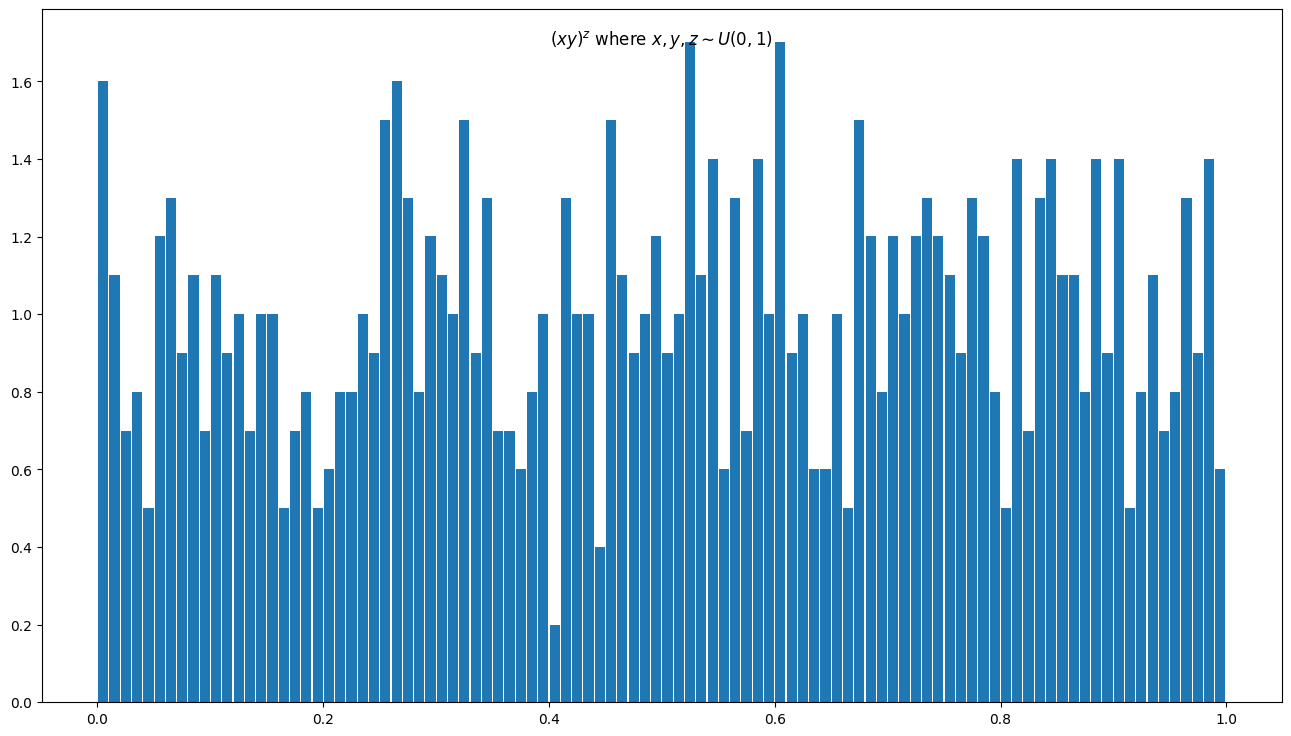

In [13]:

# Here's the challenge mode for all you math whizzes.
# Sample three numbers x, y, z uniformly at random in [0, 1],
# and compute (xy)^z. What distribution describes this result?
# Answer: It's uniform!
from pandas import Series
import random
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9))
Series([(x*y)**z for x, y, z in zip(
    [random.uniform(0, 1) for i in range(1_000)], [random.uniform(0, 1) for i in range(1_000)], [random.uniform(0, 1) for i in range(1_000)]
)]).hist(
    cumulative=False, density=1, bins=100, ax=ax, align='mid', rwidth=.9
)
ax.grid(False)

# Add annotation
ax.annotate(r'$(xy)^z$ where $x, y, z \sim U(0, 1)$', xy=(0.5, 0.95), xycoords='axes fraction', fontsize=12, ha='center')
plt.show()

In [11]:

# <input class="input__input error text-input-error error--is-inline" autocomplete="on" data-tracking-control-name="registration-frontend_join-form-name_last-name" id="last-name" name="last-name" placeholder="Last name" type="text" required="required">
wsu.fill_in_field(driver, field_name='last-name',
                   field_value='Babbitt',
                   input_css='#last-name', verbose=True)

Filling in the last-name field with Babbitt


In [10]:

# <input class="input__input error text-input-error error--is-inline" autocomplete="on" data-tracking-control-name="registration-frontend_join-form-name_first-name" id="first-name" name="first-name" placeholder="First name" type="text" required="required">
wsu.fill_in_field(driver, field_name='first-name',
                   field_value='Dave',
                   input_css='#first-name', verbose=True)

Filling in the first-name field with Dave


In [12]:

# <button class="join-form__form-body-submit-button join-form__form-body-submit-button--no-agreement-text" data-tracking-control-name="registration-frontend_join-form-submit" id="join-form-submit" value="Continue" type="submit" style="">Continue</button>
button_xpath = '//*[@id="join-form-submit"]'
wsu.click_by_xpath(driver, xpath=button_xpath, verbose=True) 

Clicking //*[@id="join-form-submit"]


In [13]:

wsu.driver_get_url(driver, wsu.linkedin_url, verbose=True)

Getting URL: https://www.linkedin.com/home


In [14]:

# <a class="sign-in-form__sign-in-cta btn-md btn-secondary babybear:w-full block mb-3 mx-auto min-h-[40px] py-1" href="https://www.linkedin.com/login" data-test-id="home-hero-sign-in-cta" data-tracking-control-name="homepage-basic_home-hero-sign-in-cta" data-tracking-will-navigate="" data-tracking-client-ingraph="">Sign in with email</a>
button_xpath = '/html/body/main/section[1]/div/div/a'
wsu.click_by_xpath(driver, xpath=button_xpath, verbose=True)

Clicking /html/body/main/section[1]/div/div/a


In [15]:

# <input id="username" name="session_key" aria-describedby="error-for-username" required="" validation="email|tel" value="" autofocus="" autocomplete="username" aria-label="Email or phone" type="text">
wsu.fill_in_field(driver, field_name='session_key',
                   field_value=wsu.secrets_json['linkedin']['email'],
                   input_css='#username',
                   verbose=True)

Filling in the session_key field with dave.babbitt@gmail.com


In [16]:

# <input id="password" aria-describedby="error-for-password" name="session_password" required="" validation="password" autocomplete="current-password" aria-label="Password" type="password">
wsu.fill_in_field(driver, field_name='session_password',
                   field_value=wsu.secrets_json['linkedin']['password'],
                   input_css='#password', verbose=False)

In [17]:

# <button class="btn__primary--large from__button--floating" data-litms-control-urn="login-submit" aria-label="Sign in" type="submit">Sign in</button>
button_xpath = '/html/body/div[1]/main/div[2]/div[1]/form/div[3]/button'
wsu.click_by_xpath(driver, xpath=button_xpath, verbose=True) 

Clicking /html/body/div[1]/main/div[2]/div[1]/form/div[3]/button


In [ ]:


# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=new_sequence, cmap='viridis')
plt.title('Document Cluster Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
integer_to_string_map = {v: k for k, v in string_to_integer_map.items()}
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [49]:

wikipedia_url = 'https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3'
page_soup = nu.get_page_soup(wikipedia_url, verbose=False)

# <div class="div-col" style="column-width: 20em;">
div_soups_list = page_soup.find_all('div', attrs={'class': 'div-col'})
li_soups_list = div_soups_list[0].find_all('li')
alpha3_to_country_dict = {}
country_to_alpha3_dict = {}
for li_soup in li_soups_list:
    for span_soup in li_soup.find_all('span', attrs={'class': 'monospaced'}):
        tla = span_soup.text
    for a_soup in li_soup.find_all('a', attrs={'title': True}):
        country = a_soup.text
    alpha3_to_country_dict[tla] = country
    country_to_alpha3_dict[country] = tla

In [1]:

%pprint

Pretty printing has been turned OFF



---
# Load needed libraries and functions

In [2]:

import os
import re
import sys

# Insert at 1, 0 is the script path (or '' in REPL)
if ('../py' not in sys.path): sys.path.insert(1, '../py')

In [3]:

# Get the Storage object
from storage import Storage
s = Storage(
    data_folder_path=os.path.abspath('../data'),
    saves_folder_path=os.path.abspath('../saves')
)

In [4]:

# Get all our file names data
import pandas as pd

# Get the HeaderAnalysis object
from ha_utils import HeaderAnalysis
ha = HeaderAnalysis(s=s, verbose=False)

# Get the WebScrapingUtilities object
from scrape_utils import WebScrapingUtilities
wsu = WebScrapingUtilities(
    s=s,
    secrets_json_path=os.path.abspath('../data/secrets/jh_secrets.json')
)
uri = wsu.secrets_json['neo4j']['connect_url']
user =  wsu.secrets_json['neo4j']['username']
password = wsu.secrets_json['neo4j']['password']

# Get the CypherUtilities object and Neo4j driver
from cypher_utils import CypherUtilities
cu = CypherUtilities(
    uri=uri, user=user, password=password, driver=None, s=s, ha=ha
)

cypher_str = '''
    MATCH (fn:FileNames)
    RETURN fn;'''
row_objs_list = cu.get_execution_results(cypher_str, verbose=False)
hunting_df = pd.DataFrame(
    [{k: v for k, v in row_obj['fn'].items()} for row_obj in row_objs_list]
)

In [5]:

s.save_dataframes(hunting_df=hunting_df)

Saving to C:\Users\daveb\OneDrive\Documents\GitHub\job-hunting\saves\csv\hunting_df.csv


In [6]:

# Get the databased quals
cypher_str = '''
    MATCH (qs:QualificationStrings)
    RETURN qs;'''
row_objs_list = cu.get_execution_results(cypher_str, verbose=False)
basic_quals_df = pd.DataFrame(
    [{k: v for k, v in row_obj['qs'].items()} for row_obj in row_objs_list]
)

In [7]:

s.save_dataframes(basic_quals_df=basic_quals_df)

Saving to C:\Users\daveb\OneDrive\Documents\GitHub\job-hunting\saves\csv\basic_quals_df.csv
